**Desafio 4 - Modulo 4 do Bootcamp Analista de Machine Learning da IGTI**

Utilizando o código abaixo, reponda as perguntas:



---



**Quando o aprendizado da rede neural ocorre?**

*Resposta: O aprendizado ocorre quando a rede neural atinge uma solução generalizada para uma classe de problemas.*

**Para grandes volumes de dados (modelos complexos), o desempenho de algoritmos baseados em aprendizado profundo é:**

*Resposta: Superior às técnicas tradicionais em machine learning.*

**Uma rede neural que poderíamos utilizar no nosso desafio para reconhecer imagens é:**

*Resposta: Rede Neural Profunda.*

**Pensando no conceito de Inteligência Artificial, podemos dizer que esse modelo é:**

*Resposta: Um modelo inteligente que exibe as características as quais nós associamos à inteligência no comportamento humano.*

**Considere a afirmação “O desempenho do sistema deve melhorar na repetição da mesma tarefa e nas tarefas similares do domínio.”
Podemos dizer que ela se aplica ao nosso desafio?**

*Resposta: Podemos dizer que se aplica ao desafio.*

**Ao final, para fazer a separação das flores o modelo construído, utilizou-se da técnica de:**

*Resposta: Classificação*

**Qual o tipo de técnica utilizada pelo modelo para classificar as imagens?**

*Resposta: Clusterização*

**Podemos afirmar sobre a camada de convolução de uma rede neural CNN:**

*Resposta: É a mais importante operação de uma rede CNN.*

**Para que serve o comando plt.show()?**

*Resposta: Para plotar algo na tela.*

**Para que serve o comando model.fit?**

*Resposta: Treinamento*

**Em uma rede neural CNN, podemos afirmar sobre a camada de pooling que:**

*Resposta: Reduz drasticamente a dimensão espacial da entrada.*

**Os dados baixados contendo as imagens estão separados em quantos diretórios?**

*Resposta: 5*

**Neste problema, quantas classes de flores foram identificadas?**

Resposta: Cinco classes. 

**O conjunto de dados utilizado tem quantas imagens?**

*Resposta: 3670*


**Podemos considerar que o conjunto de dados utilizados para treinar o modelo foi:**

*Resposta: Rotulado*

In [ ]:
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as display
from PIL import Image

In [ ]:
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', fname='flower_photos', untar=True)

data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
class_names = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
class_names

array(['dandelion', 'daisy', 'tulips', 'roses', 'sunflowers'],
      dtype='<U10')

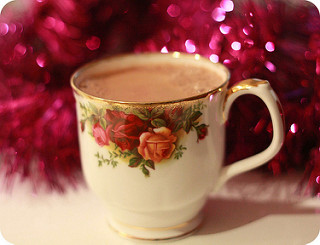

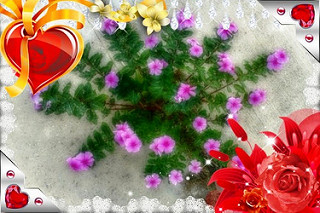

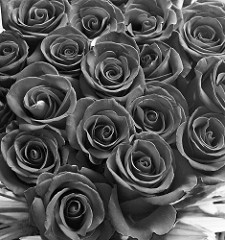

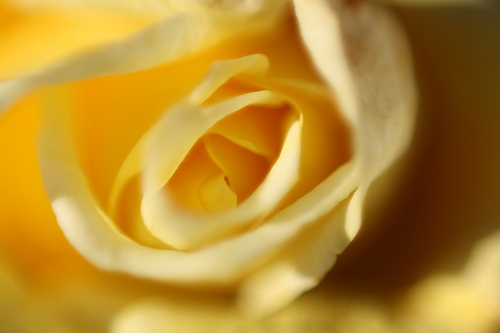

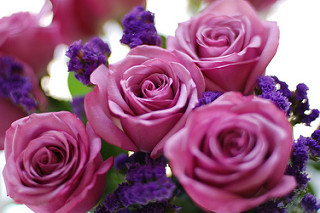

In [ ]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:5]:
  display.display(Image.open(str(image_path)))

In [ ]:
module_selection = ("mobilenet_v2_100_224", 224) 
handle_base, pixels = module_selection
MODULE_HANDLE ="https://tfhub.dev/google/imagenet/{}/feature_vector/4".format(handle_base)
IMAGE_SIZE = (pixels, pixels)
print("Using {} with input size {}".format(MODULE_HANDLE, IMAGE_SIZE))

BATCH_SIZE = 32 

Using https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4 with input size (224, 224)


In [ ]:
datagen_kwargs = dict(rescale=1./255, validation_split=.20)
dataflow_kwargs = dict(target_size=IMAGE_SIZE, batch_size=BATCH_SIZE,
                   interpolation="bilinear")

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    **datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
    data_dir, subset="validation", shuffle=False, **dataflow_kwargs)

do_data_augmentation = False 
if do_data_augmentation:
  train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
      rotation_range=40,
      horizontal_flip=True,
      width_shift_range=0.2, height_shift_range=0.2,
      shear_range=0.2, zoom_range=0.2,
      **datagen_kwargs)
else:
  train_datagen = valid_datagen
train_generator = train_datagen.flow_from_directory(
    data_dir, subset="training", shuffle=True, **dataflow_kwargs)

Found 731 images belonging to 5 classes.
Found 2939 images belonging to 5 classes.


In [ ]:
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)
print("GPU is", "available" if tf.test.is_gpu_available() else "NOT AVAILABLE")

TF version: 2.3.0
Hub version: 0.9.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU is NOT AVAILABLE


In [ ]:
do_fine_tuning = False 
print("Building model with", MODULE_HANDLE)
model = tf.keras.Sequential([
    # Explicitly define the input shape so the model can be properly
    # loaded by the TFLiteConverter
    tf.keras.layers.InputLayer(input_shape=IMAGE_SIZE + (3,)),
    hub.KerasLayer(MODULE_HANDLE, trainable=do_fine_tuning),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(train_generator.num_classes,
                          kernel_regularizer=tf.keras.regularizers.l2(0.0001))
])
model.build((None,)+IMAGE_SIZE+(3,))
model.summary()

Building model with https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.SGD(lr=0.005, momentum=0.9), 
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True, label_smoothing=0.1),
  metrics=['accuracy'])

In [ ]:
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = valid_generator.samples // valid_generator.batch_size
hist = model.fit(
    train_generator,
    epochs=5, steps_per_epoch=steps_per_epoch,
    validation_data=valid_generator,
    validation_steps=validation_steps).history

Epoch 1/5
91/91 [==============================] - 112s 1s/step - loss: 0.9317 - accuracy: 0.7558 - val_loss: 0.7456 - val_accuracy: 0.8494
Epoch 2/5
91/91 [==============================] - 111s 1s/step - loss: 0.6892 - accuracy: 0.8806 - val_loss: 0.7298 - val_accuracy: 0.8466
Epoch 3/5
91/91 [==============================] - 111s 1s/step - loss: 0.6443 - accuracy: 0.9040 - val_loss: 0.6915 - val_accuracy: 0.8679
Epoch 4/5
91/91 [==============================] - 111s 1s/step - loss: 0.6234 - accuracy: 0.9174 - val_loss: 0.7074 - val_accuracy: 0.8580
Epoch 5/5
91/91 [==============================] - 110s 1s/step - loss: 0.6053 - accuracy: 0.9267 - val_loss: 0.6793 - val_accuracy: 0.8736


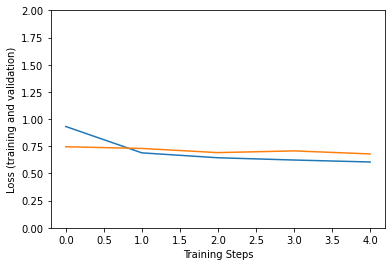

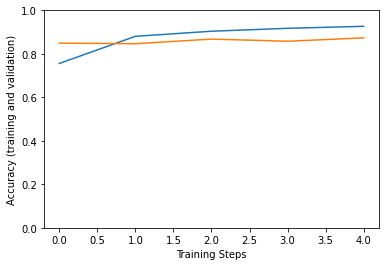

In [ ]:
plt.figure()
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])

plt.figure()
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])